In [25]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from numpy.linalg import svd
from numpy.linalg import matrix_rank
from sklearn.decomposition import NMF
from numpy import array, matrix, linalg
from clean_data import non_popular_clean, pivot_data

In [20]:
df = pd.read_csv('../../StateNames.csv')

In [4]:
def clean_data(df):#, pivot_vals, pivot_index, pivot_col):
    df['new_name'] = df.Name.str.lower()
    df = df.set_index(['Year','State'])
    df['name_gender'] = zip(df.new_name, df.Gender)
    df = df.drop(['Year', 'State', 'new_name'])
    
    date_state_series = df.groupby(df.index).sum()['Count']
    df['tuple_index'] = df.index.values
    df = df.join(date_state_series, how='left', on='tuple_index', lsuffix='_by_name')
    
    df['count_norm'] = df.Count_by_name / df.Count
    
    return df

In [5]:
def time_period_clean(df, start_date, end_date):
    df = df[(df['Year'] >= start_date) & (df['Year'] <= end_date)]
    df['new_name'] = df.Name.str.lower()
    df = df.set_index(['Year','State'])
    df['name_gender'] = zip(df.new_name, df.Gender)
    df = df.drop(['Year', 'State', 'new_name'])
    
    date_state_series = df.groupby(df.index).sum()['Count']
    df['tuple_index'] = df.index.values
    df = df.join(date_state_series, how='left', on='tuple_index', lsuffix='_by_name')
    
    df['count_norm'] = df.Count_by_name / df.Count
    
    return df  

In [141]:
sub_df = pd.read_csv('../../StateNames.csv')

In [79]:
# sub_df = sub_df[(sub_df['Year'] >= 1950)]

In [71]:
def pivot_data(df, pivot_vals, pivot_index, pivot_cols):
    data_pivot = pd.pivot_table(df, values=pivot_vals, index=pivot_index, columns=pivot_cols)
    data_pivot = data_pivot.fillna(0)
    return data_pivot

In [6]:
#Further cleaning
df['tuple_index'] = df.index.values
df = df.join(date_state_series, how='left', on='tuple_index', lsuffix='name_count')

In [7]:
df = clean_data(df)

In [18]:
name_pivot = pd.pivot_table(df, values='count_norm',index=df.name_gender, columns=df.index)
name_pivot = name_pivot.fillna(0)

In [14]:
def run_nmf(df,params):
    nmf = NMF(n_components=params)
    W = nmf.fit_transform(df)
    H = nmf.components_
    return W, H, nmf, nmf.reconstruction_err_

In [62]:
def recon_error(df, k):
    nmf = NMF(n_components=k)
    W = nmf.fit_transform(df)
    H = nmf.components_
    return nmf.reconstruction_err_

In [12]:
def print_top_features(W, H, features, top_features, data_matrix):
    print "Reconstruction Error: %f" %reconst_mse(data_matrix, W, H)
#     print "SKlearn Reconstruction Err: %f" %
    for latent_num, latent in enumerate(H):
        print "Latent Feature %d" % (int(latent_num) + 1)
        print [features[i] for i in latent.argsort()[:-top_features-1:-1]]
        print 

In [17]:
def reconst_mse(target, left, right):
#     print left, right, target
    return (np.array(target - left.dot(right))**2).sum()

In [113]:
# def scree_plot(pca):
#     vals = pca.explained_variance_ratio_
#     plt.figure(figsize=(10, 6), dpi=250)
#     cum_var = np.cumsum(vals)
#     ax = plt.subplot(111)

#     ax.plot(range(len(vals) + 1), np.insert(cum_var, 0, 0), color = 'r', marker = 'o')
#     ax.bar(range(len(vals)), vals, alpha = 0.8)
    
#     ax.axhline(0.9, color = 'g', linestyle = "--")
#     ax.set_xlabel("Principal Component", fontsize=12)
#     ax.set_ylabel("Variance Explained (%)", fontsize=12)

#     plt.title("Scree Plot for the Digits Dataset", fontsize=16)

In [20]:
state_features = name_pivot.columns

In [36]:
#these variables need to be rerun
W, H, name_nmf = run_nmf(name_pivot,10)

In [104]:
# print_top_features(W, H, state_features, 15, name_pivot)

In [9]:
pivot_vals = 'count_norm'
pivot_index = df.index
pivot_col = df.name_gender

In [10]:
data_pivot = pd.pivot_table(df, values=pivot_vals, index=pivot_index, columns=pivot_col)
data_pivot = data_pivot.fillna(0)

In [11]:
data_pivot.shape

(5355, 33170)

In [59]:
pd.set_option('max_rows', 1000)

In [13]:
name_features = data_pivot.columns

In [15]:
W2, H2, state_nmf, error = run_nmf(data_pivot,4)

In [18]:
print_top_features(W2, H2, name_features, 10, data_pivot)

Reconstruction Error: 6.563312
Latent Feature 1
[('mary', 'F'), ('john', 'M'), ('william', 'M'), ('james', 'M'), ('robert', 'M'), ('dorothy', 'F'), ('helen', 'F'), ('george', 'M'), ('charles', 'M'), ('margaret', 'F')]

Latent Feature 2
[('michael', 'M'), ('jennifer', 'F'), ('christopher', 'M'), ('david', 'M'), ('jason', 'M'), ('james', 'M'), ('matthew', 'M'), ('brian', 'M'), ('john', 'M'), ('robert', 'M')]

Latent Feature 3
[('robert', 'M'), ('james', 'M'), ('david', 'M'), ('john', 'M'), ('richard', 'M'), ('michael', 'M'), ('linda', 'F'), ('patricia', 'F'), ('william', 'M'), ('mary', 'F')]

Latent Feature 4
[('jacob', 'M'), ('joshua', 'M'), ('matthew', 'M'), ('tyler', 'M'), ('emily', 'F'), ('andrew', 'M'), ('ashley', 'F'), ('nicholas', 'M'), ('ryan', 'M'), ('michael', 'M')]



In [19]:
type(H2)

numpy.ndarray

In [214]:
test_pivot = pd.pivot_table(df_1950, values='count_norm', index=df_1950.tuple_index, columns=df_1950.name_gender)

In [216]:
test_array = test_pivot.as_matrix()
# matrix_rank(test_array)

In [63]:
# df[(df['tuple_index'] == (1940,'RI')) | (df['tuple_index'] == (1941,'RI')) | (df['tuple_index'] == (1942,'RI')) | 
#    (df['tuple_index'] == (1938,'RI')) | (df['tuple_index'] == (1939,'RI'))]

In [84]:
##Trying the analysis on data after 1950 (when there is a larger selection of names per year)
df_1950 = time_period_clean(sub_df, 1950)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [87]:
pivot_1950 = pivot_data(df_1950, 'count_norm', 'name_gender', 'tuple_index')

In [88]:
pivot_1950.shape

(29906, 3315)

In [202]:
W_1950, H_1950, name_nmf_1950 = run_nmf(pivot_1950,2)

In [237]:
# print_top_features(W_1950, H_1950, state_features_1950, 10, pivot_1950)
recon_error(pivot_1950, 10)

1.035103540590276

In [212]:
pivot_1950.duplicated().sum()
#array = pivot_1950.as_matrix()

4902

In [220]:
pivot_1950.shape

(29906, 3315)

In [211]:
matrix_rank(array)

1

In [102]:
nmf = NMF(n_components=10)
W = nmf.fit_transform(pivot_1950)

In [103]:
H = nmf.components_

In [105]:
state_features_1950 = pivot_1950.columns

In [116]:
# print_top_features(W,H,state_features_1950,15,pivot_1950)

In [107]:
state_pivot_1950 = pivot_data(df_1950, 'count_norm', 'tuple_index', 'name_gender')

In [110]:
W_1950, H_1950, nmf_1950 = run_nmf(state_pivot_1950,10)

In [111]:
name_features_1950 = state_pivot_1950.columns

In [115]:
# print_top_features(W_1950,H_1950,name_features_1950,15,state_pivot_1950)

In [143]:
###Very recent decade subsection
df_1990 = time_period_clean(sub_df, 1990)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [144]:
name_pivot_1990 = pivot_data(df_1990, 'count_norm', 'name_gender', 'tuple_index')

In [145]:
W_1990, H_1990, nmf_1990 = run_nmf(name_pivot_1990,10)

In [146]:
state_features_1990 = name_pivot_1990.columns

In [176]:
# Looking at these results has me thinking that there continues to be regional trends with names. Groupings are regional
# and time-based...the question is if there is a continuing trend with these regional influences and what we can predict
# or say culturally about those groupings.

# print_top_features(W_1990,H_1990,state_features_1990,15,name_pivot_1990)

In [150]:
W_df = pd.DataFrame(W_1990, index=name_pivot_1990.index)

In [151]:
H_df = pd.DataFrame(H_1990, columns=state_features_1990)

In [221]:
df_1990.head()

Id      Name Gender  Count_by_name  new_name    name_gender  \
Year State                                                                  
1990 AK     8496   Jessica      F            112   jessica   (jessica, F)   
     AK     8497    Ashley      F             96    ashley    (ashley, F)   
     AK     8498    Amanda      F             92    amanda    (amanda, F)   
     AK     8499  Brittany      F             75  brittany  (brittany, F)   
     AK     8500  Samantha      F             72  samantha  (samantha, F)   

           tuple_index  Count  count_norm  
Year State                                 
1990 AK     (1990, AK)   7830    0.014304  
     AK     (1990, AK)   7830    0.012261  
     AK     (1990, AK)   7830    0.011750  
     AK     (1990, AK)   7830    0.009579  
     AK     (1990, AK)   7830    0.009195

In [250]:
# df_1990[(df_1990.tuple_index==(2014,'VA'))&(df_1990.new_name =='aadhya')]

In [182]:
def run_decade_nmf(df, (start_date, end_date), n_factors):
    decade_df = time_period_clean(df, start_date, end_date)
    decade_pivot = pivot_data(decade_df, 'count_norm', 'name_gender', 'tuple_index')
    
    W, H, nmf = run_nmf(decade_pivot,n_factors)
    
    state_features = decade_pivot.columns
    
    print print_top_features(W,H,state_features,15,decade_pivot)
    
    return W, H, nmf

In [256]:
W_60, H_60, nmf_60 = run_decade_nmf(sub_df, (1960,1969), 2)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Reconstruction Error: 0.231679
Latent Feature 1
[(1968, 'VT'), (1969, 'RI'), (1968, 'NH'), (1969, 'NH'), (1968, 'RI'), (1969, 'VT'), (1967, 'VT'), (1967, 'NH'), (1966, 'VT'), (1967, 'RI'), (1969, 'MA'), (1966, 'NH'), (1969, 'ME'), (1968, 'MA'), (1968, 'WY')]

Latent Feature 2
[(1960, 'TN'), (1961, 'TN'), (1960, 'KY'), (1960, 'NC'), (1961, 'SC'), (1960, 'SC'), (1961, 'NC'), (1962, 'SC'), (1963, 'SC'), (1960, 'AR'), (1960, 'AL'), (1961, 'AL'), (1961, 'AR'), (1962, 'TN'), (1964, 'SC')]

None


In [257]:
W_70, H_70, nmf_70 = run_decade_nmf(sub_df, (1970,1979), 2)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Reconstruction Error: 0.228899
Latent Feature 1
[(1970, 'DE'), (1970, 'RI'), (1971, 'DE'), (1972, 'DE'), (1971, 'WV'), (1971, 'RI'), (1970, 'WV'), (1973, 'DE'), (1970, 'MA'), (1970, 'MD'), (1972, 'WV'), (1970, 'KY'), (1971, 'KY'), (1970, 'PA'), (1970, 'AK')]

Latent Feature 2
[(1978, 'VT'), (1979, 'VT'), (1976, 'VT'), (1978, 'ND'), (1979, 'ND'), (1977, 'VT'), (1977, 'ND'), (1979, 'ME'), (1979, 'SD'), (1979, 'NH'), (1977, 'SD'), (1978, 'ME'), (1978, 'IA'), (1978, 'NH'), (1978, 'SD')]

None


In [258]:
W_80, H_80, nmf_80 = run_decade_nmf(sub_df, (1980,1989), 2)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Reconstruction Error: 0.213688
Latent Feature 1
[(1981, 'RI'), (1981, 'DE'), (1980, 'RI'), (1982, 'DE'), (1980, 'DE'), (1982, 'RI'), (1983, 'DE'), (1983, 'RI'), (1980, 'CT'), (1981, 'CT'), (1980, 'NV'), (1981, 'MA'), (1980, 'WV'), (1980, 'NH'), (1982, 'CT')]

Latent Feature 2
[(1989, 'ND'), (1987, 'ND'), (1988, 'ND'), (1989, 'SD'), (1987, 'SD'), (1988, 'SD'), (1989, 'IA'), (1988, 'IA'), (1989, 'WY'), (1986, 'ND'), (1989, 'VT'), (1989, 'NE'), (1988, 'WY'), (1987, 'WY'), (1987, 'VT')]

None


In [259]:
W_90, H_90, nmf_90 = run_decade_nmf(sub_df, (1990,1999), 2)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Reconstruction Error: 0.190039
Latent Feature 1
[(1990, 'DE'), (1990, 'RI'), (1991, 'RI'), (1991, 'DE'), (1992, 'RI'), (1990, 'WV'), (1990, 'NH'), (1990, 'CT'), (1992, 'DE'), (1991, 'CT'), (1990, 'MA'), (1990, 'VT'), (1991, 'MA'), (1991, 'WV'), (1990, 'KY')]

Latent Feature 2
[(1999, 'ND'), (1998, 'ND'), (1997, 'ND'), (1999, 'SD'), (1998, 'VT'), (1998, 'SD'), (1999, 'WY'), (1999, 'VT'), (1996, 'ND'), (1999, 'ME'), (1997, 'SD'), (1998, 'WY'), (1999, 'WV'), (1997, 'WY'), (1996, 'SD')]

None


In [255]:
W_00, H_00, nmf_00 = run_decade_nmf(sub_df, (2000,2014), 2)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Reconstruction Error: 0.270490
Latent Feature 1
[(2000, 'DE'), (2000, 'NH'), (2000, 'RI'), (2000, 'WY'), (2000, 'VT'), (2001, 'DE'), (2001, 'RI'), (2002, 'RI'), (2002, 'DE'), (2001, 'NH'), (2001, 'WY'), (2000, 'ME'), (2001, 'WV'), (2001, 'VT'), (2000, 'WV')]

Latent Feature 2
[(2012, 'VT'), (2013, 'VT'), (2011, 'VT'), (2014, 'VT'), (2012, 'WY'), (2010, 'VT'), (2013, 'WY'), (2014, 'WY'), (2011, 'ND'), (2009, 'VT'), (2013, 'ME'), (2012, 'ME'), (2012, 'ND'), (2014, 'ME'), (2013, 'NH')]

None


In [328]:
# def run_pop_nmf(df, n_factors):
    
#     W, H, nmf, error = run_nmf(df,n_factors)
    
#     state_features = df.columns
    
#     print "SKlearn error: %f" %error
#     print print_top_features(W,H,state_features,20,df)
    
#     return W, H, nmf

In [6]:
mid_pop = df[(df.Count_name_count>=50) & (df.Count_name_count<=1000)]

AttributeError: 'DataFrame' object has no attribute 'Count_name_count'

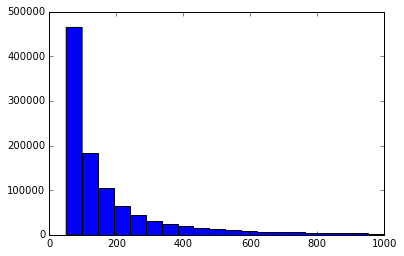

In [319]:
plt.hist(mid_pop.Count_name_count, bins=20);

In [320]:
mid_pop.Count_name_count.describe()

count    1.017532e+06
mean     1.710485e+02
std      1.646673e+02
min      5.000000e+01
25%      6.900000e+01
50%      1.060000e+02
75%      1.990000e+02
max      1.000000e+03
Name: Count_name_count, dtype: float64

In [321]:
df.Count_name_count.describe()

count    5.647426e+06
mean     5.292381e+01
std      1.808100e+02
min      5.000000e+00
25%      7.000000e+00
50%      1.300000e+01
75%      3.400000e+01
max      1.002300e+04
Name: Count_name_count, dtype: float64

In [322]:
mid_pop_pivot = pivot_data(mid_pop, 'count_norm', mid_pop.name_gender, mid_pop.tuple_index)

In [323]:
mid_pop_pivot.shape

(3484, 5263)

In [324]:
W, H, mid_nmf = run_pop_nmf(mid_pop_pivot, 10)

SKlearn error: 2.168260
Reconstruction Error: 4.701351
Latent Feature 1
[(1934, 'NH'), (1937, 'NH'), (1933, 'NH'), (1932, 'NH'), (1935, 'NH'), (1935, 'RI'), (1937, 'RI'), (1934, 'RI'), (1936, 'NH'), (1931, 'NH'), (1936, 'RI'), (1936, 'VT'), (1930, 'NH'), (1934, 'VT'), (1934, 'DE')]

Latent Feature 2
[(1987, 'ND'), (1988, 'IA'), (1991, 'WV'), (1988, 'ND'), (1989, 'NE'), (1989, 'IA'), (1990, 'WV'), (1990, 'NH'), (1992, 'WV'), (1989, 'WV'), (1988, 'ME'), (1989, 'KY'), (1989, 'ME'), (1988, 'NE'), (1987, 'IA')]

Latent Feature 3
[(1962, 'RI'), (1955, 'RI'), (1958, 'RI'), (1964, 'RI'), (1954, 'NV'), (1961, 'RI'), (1960, 'RI'), (1953, 'NV'), (1959, 'RI'), (1950, 'NV'), (1954, 'AK'), (1963, 'RI'), (1953, 'VT'), (1956, 'RI'), (1957, 'RI')]

Latent Feature 4
[(1917, 'CT'), (1918, 'CT'), (1913, 'NJ'), (1912, 'MA'), (1912, 'NJ'), (1913, 'MA'), (1921, 'CT'), (1911, 'MA'), (1918, 'WI'), (1911, 'IL'), (1910, 'IL'), (1911, 'OH'), (1910, 'OH'), (1915, 'WI'), (1917, 'NJ')]

Latent Feature 5
[(2006, 'WV'

In [329]:
W, H, mid_nmf_50 = run_pop_nmf(mid_pop_pivot, 10)

SKlearn error: 2.168260
Reconstruction Error: 4.701349
Latent Feature 1
[(1934, 'NH'), (1937, 'NH'), (1933, 'NH'), (1932, 'NH'), (1935, 'NH'), (1935, 'RI'), (1937, 'RI'), (1934, 'RI'), (1936, 'NH'), (1931, 'NH'), (1936, 'RI'), (1936, 'VT'), (1930, 'NH'), (1934, 'VT'), (1934, 'DE'), (1931, 'OR'), (1935, 'VT'), (1938, 'RI'), (1929, 'OR'), (1933, 'DE')]

Latent Feature 2
[(1976, 'NH'), (1975, 'NH'), (1974, 'NH'), (1976, 'RI'), (1975, 'ME'), (1977, 'RI'), (1978, 'RI'), (1977, 'NH'), (1973, 'NH'), (1975, 'RI'), (1974, 'RI'), (1974, 'ME'), (1977, 'ME'), (1976, 'ME'), (1975, 'ND'), (1976, 'ND'), (1979, 'NH'), (1976, 'VT'), (1974, 'VT'), (1978, 'NH')]

Latent Feature 3
[(1966, 'IA'), (1965, 'IA'), (1966, 'MN'), (1964, 'IA'), (1963, 'IA'), (1967, 'IA'), (1967, 'MN'), (1968, 'MN'), (1968, 'IA'), (1970, 'MN'), (1968, 'KY'), (1970, 'MO'), (1967, 'MD'), (1967, 'KY'), (1968, 'MD'), (1968, 'MO'), (1965, 'MN'), (1969, 'WI'), (1971, 'MO'), (1966, 'MO')]

Latent Feature 4
[(1943, 'IA'), (1944, 'IA'), (1

In [330]:
mid_pop_name = pivot_data(mid_pop, 'count_norm', mid_pop.tuple_index,mid_pop.name_gender)

In [332]:
W, H, mid_nmf_50 = run_pop_nmf(mid_pop_name, 10)

SKlearn error: 2.169397
Reconstruction Error: 4.706283
Latent Feature 1
[('robert', 'M'), ('richard', 'M'), ('john', 'M'), ('william', 'M'), ('donald', 'M'), ('james', 'M'), ('betty', 'F'), ('barbara', 'F'), ('charles', 'M'), ('shirley', 'F'), ('patricia', 'F'), ('mary', 'F'), ('george', 'M'), ('dorothy', 'F'), ('david', 'M'), ('joan', 'F'), ('raymond', 'M'), ('doris', 'F'), ('paul', 'M'), ('kenneth', 'M')]

Latent Feature 2
[('ashley', 'F'), ('joshua', 'M'), ('jessica', 'F'), ('matthew', 'M'), ('andrew', 'M'), ('brandon', 'M'), ('amanda', 'F'), ('justin', 'M'), ('nicholas', 'M'), ('sarah', 'F'), ('ryan', 'M'), ('tyler', 'M'), ('christopher', 'M'), ('jacob', 'M'), ('kyle', 'M'), ('michael', 'M'), ('zachary', 'M'), ('megan', 'F'), ('emily', 'F'), ('daniel', 'M')]

Latent Feature 3
[('patricia', 'F'), ('barbara', 'F'), ('ronald', 'M'), ('carol', 'F'), ('larry', 'M'), ('gary', 'M'), ('sharon', 'F'), ('sandra', 'F'), ('nancy', 'F'), ('linda', 'F'), ('donald', 'M'), ('richard', 'M'), ('donn

In [27]:
names_total = df.groupby('name_gender')['Count_by_name'].sum()

In [341]:
names_total.sort(ascending=False)

/Users/courtneymorris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [30]:
updated_df = df.join(names_total, how='left', on='name_gender', lsuffix='_per_year')

In [31]:
updated_df.head()

Id      Name Gender  Count_by_name_per_year  new_name  \
Year State                                                          
1910 AK      1      Mary      F                      14      mary   
     AK      2     Annie      F                      12     annie   
     AK      3      Anna      F                      10      anna   
     AK      4  Margaret      F                       8  margaret   
     AK      5     Helen      F                       7     helen   

              name_gender tuple_index  Count  count_norm  Count_by_name  
Year State                                                               
1910 AK         (mary, F)  (1910, AK)    115    0.121739        3730856  
     AK        (annie, F)  (1910, AK)    115    0.104348         274883  
     AK         (anna, F)  (1910, AK)    115    0.086957         725146  
     AK     (margaret, F)  (1910, AK)    115    0.069565        1121985  
     AK        (helen, F)  (1910, AK)    115    0.060870         895615

In [33]:
non_popular_df = updated_df[(updated_df['Count_by_name_per_year'] >= 150)&(updated_df['Count_by_name_per_year'] < 1000000)]

In [34]:
non_popular_state = pivot_data(non_popular_df, 'count_norm', non_popular_df.name_gender, non_popular_df.tuple_index)

In [42]:
W, H, non_popular_nmf = run_pop_nmf(non_popular_state, 35)

SKlearn error: 1.305433
Reconstruction Error: 1.704154
Latent Feature 1
Latent Feature 2
Latent Feature 3
Latent Feature 4
Latent Feature 5
[(1944, 'NH'), (1937, 'NH'), (1939, 'NH'), (1934, 'NH'), (1935, 'NH'), (1940, 'NH'), (1938, 'NH'), (1941, 'NH'), (1943, 'NH'), (1933, 'NH'), (1946, 'NH'), (1940, 'VT'), (1932, 'NH'), (1934, 'VT'), (1945, 'NH'), (1936, 'NH'), (1935, 'VT'), (1939, 'ME'), (1930, 'NH'), (1935, 'ME')]
Latent Feature 6
[(1917, 'NJ'), (1919, 'NJ'), (1915, 'NJ'), (1916, 'NJ'), (1914, 'NJ'), (1918, 'NJ'), (1922, 'NJ'), (1921, 'NJ'), (1920, 'NJ'), (1923, 'NJ'), (1924, 'NJ'), (1912, 'NY'), (1914, 'NY'), (1913, 'NY'), (1925, 'NJ'), (1918, 'CT'), (1910, 'NY'), (1926, 'NJ'), (1916, 'NY'), (1915, 'NY')]
Latent Feature 7
[(1930, 'WY'), (1938, 'VT'), (1927, 'NH'), (1932, 'VT'), (1945, 'DE'), (1926, 'NH'), (1925, 'NH'), (1937, 'VT'), (1933, 'VT'), (1923, 'OR'), (1927, 'VT'), (1944, 'VT'), (1919, 'OR'), (1923, 'NH'), (1924, 'NH'), (1922, 'MT'), (1921, 'OR'), (1928, 'VT'), (1929, 'VT'

In [353]:
non_popular_name = pivot_data(non_popular_df, 'count_norm', non_popular_df.tuple_index, non_popular_df.name_gender)

In [355]:
W, H, non_popular_name_nmf = run_pop_nmf(non_popular_name, 30)

SKlearn error: 2.636998
Reconstruction Error: 6.953757
Latent Feature 1
[('helen', 'F'), ('betty', 'F'), ('ruth', 'F'), ('frank', 'M'), ('shirley', 'F'), ('virginia', 'F'), ('raymond', 'M'), ('alice', 'F'), ('nancy', 'F'), ('frances', 'F'), ('harold', 'M'), ('carol', 'F'), ('mildred', 'F'), ('doris', 'F'), ('walter', 'M'), ('evelyn', 'F'), ('donna', 'F'), ('larry', 'M'), ('marie', 'F'), ('jack', 'M')]

Latent Feature 2
[('ryan', 'M'), ('jacob', 'M'), ('ashley', 'F'), ('nicholas', 'M'), ('justin', 'M'), ('amanda', 'F'), ('brandon', 'M'), ('emily', 'F'), ('tyler', 'M'), ('eric', 'M'), ('jonathan', 'M'), ('benjamin', 'M'), ('melissa', 'F'), ('zachary', 'M'), ('stephanie', 'F'), ('michelle', 'F'), ('jeffrey', 'M'), ('kimberly', 'F'), ('nicole', 'F'), ('amy', 'F')]

None


In [38]:
def run_pop_nmf(df, n_factors):

    W, H, nmf, error = run_nmf(df,n_factors)

    state_features = df.columns

    print "SKlearn error: %f" %error
    print_year_diff_features(W,H,state_features,20,df)

    return W, H, nmf

In [41]:
def print_year_diff_features(W, H, features, top_features, data_matrix):
    print "Reconstruction Error: %f" %reconst_mse(data_matrix, W, H)
    for latent_num, latent in enumerate(H):
        print "Latent Feature %d" % (int(latent_num) + 1)
        results = [features[i] for i in latent.argsort()[:-top_features-1:-1]]
        result_years = [features[i][0] for i in latent.argsort()[:-top_features-1:-1]]
        year_diff = max(result_years) - min(result_years)
        if year_diff > 15:
            print results

In [ ]:
def print_W_H_features(W, H, W_features, H_features, top_features, data_matrix):
    print "Reconstruction Error: %f" %reconst_mse(data_matrix, W, H)
    for latent_num, latent in enumerate(H):
        print "Latent Feature %d" % (int(latent_num) + 1)
        print [H_features[i] for i in latent.argsort()[:-top_features-1:-1]]
        print [W_features[i] for i in W]

In [44]:
W[:,5]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])